# NLP With Hotel Review Part 2

Written by: Thai Nguyen

LinkedIn/Github: @thai22011


Date: Nov 15, 2022

---
In this deliverable, we will develop several machine learning models to correctly label the sentiment behind hotel reviews.

We will use a cleaned and preprocessed dataset, which differs from that for Part 1.

The target column is the "rating" column which is a binary column denoting good ratings as 1 and bad ones as 0.

Modeling

1. Employ a linear classifier on this dataset:
   - Fit a logisitic regression model to this data with the solver set to lbfgs. What is the accuracy score on the test set?
   - What are the 20 words most predictive of a good review (from the positive review column)? What are the 20 words most predictive with a bad review (from the negative review column)? Use the regression coefficients to answer this question
   - Reduce the dimensionality of the dataset using PCA, what is the relationship between the number of dimensions and run-time for a logistic regression?
   - List one advantage and one disadvantage of dimensionality reduction
  
2. Employ a K-Nearest Neighbour classifier on this dataset:
   - Fit a KNN model to this data. What is the accuracy score on the test set?
   - KNN is a computationally expensive model. Reduce the number of observations (data points) in the dataset. What is the relationship between the number of observations and run-time for KNN?
   - List one advantage and one disadvantage of reducing the number of observations.
   - Use the dataset to find an optimal value for K in the KNN algorithm. You will need to split your dataset into train and validation sets.
   - What is the issue with splitting the data into train and validation sets after performing vectorization?

3. Employ a Decision Tree classifier on this dataset:
   -  Fit a decision tree model to this data. What is the accuracy score on the test set?
   -  Use the data set (or a subsample) to find an optimal value for the maximum depth of the decision tree. You will need to split your data set into train and validation.
   -  Provide two advantages of decision trees over KNN. Provide two weaknesses of decision trees (classification or regression trees)

4. What is the purpose of the validation set, i.e., how is it different than the test set?

5. Re-run a decision tree or logistic regression on the data again:
   -  Perform a 5-fold cross validation to optimize the hyperparameters of your model.
   -  What does your confusion matrix look like for your best model on the test set?

6. Create one new feature of your choice:
   -  Explain your new feature and why you consider it will improve accuracy.
   -  Run the model from question 5 again. You will have to re-optimize your hyperparameters. Has the accuracy score of your best model improved on the test set after adding the new feature you created?
---

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Feature Engineering
from sklearn.preprocessing import StandardScaler


# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

The dataset contains 2 .csv files for clean train set and clean test set. We will import these csv files and save into separated dataframes. Next, we will run the logreg model on the clean train set then try to find the accuracy score on the test set

In [2]:
# Load the dataset
train_df = pd.read_csv('data/Hotel_Reviews_clean_train_p2.csv')
test_df = pd.read_csv('data/Hotel_Reviews_clean_test_p2.csv')

In [3]:
# Check
display(train_df)
display(test_df)

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,0,1
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,0,1
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,0
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12793,68,7.8,2,264,20,2,185,51.522087,-0.108244,0,...,0,0,0,0,0,0,0,0,0,0
12794,1172,7.8,10,5945,8,16,627,51.499981,-0.192879,6,...,0,0,0,0,0,0,0,0,0,0
12795,562,8.5,0,1944,26,5,702,51.492418,-0.278470,1,...,0,0,0,0,0,0,0,0,0,1
12796,154,8.0,13,768,6,2,24,51.512676,-0.186783,0,...,0,0,0,0,0,0,0,0,0,0


,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,1005,8.3,0,3469,6,2,297,51.559096,-0.284704,0,...,0,0,0,0,0,0,0,0,0,0
1,487,8.8,46,1805,121,1,4,51.474469,-0.019428,6,...,0,0,0,0,0,0,0,0,0,1
2,570,9.3,0,2319,9,1,590,51.505696,-0.101525,1,...,0,0,0,0,0,0,0,0,0,1
3,2623,8.7,19,12158,0,2,269,51.500961,-0.116591,0,...,0,0,0,0,0,0,0,0,0,0
4,365,8.1,13,1567,0,2,373,51.515125,-0.160066,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,335,8.5,0,944,7,1,269,51.540394,-0.369758,0,...,0,0,0,0,0,0,0,0,0,1
4263,406,8.2,72,2011,0,9,324,51.517972,-0.128049,1,...,0,0,0,0,1,0,0,0,0,0
4264,581,8.4,16,1994,12,1,496,51.507894,-0.143671,4,...,0,0,0,0,0,0,0,0,0,1
4265,620,9.0,58,1974,24,11,131,51.506558,-0.004514,5,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.n_.unique()

array([0, 1, 2], dtype=int64)

In [5]:
# Define X and y for TRAIN and TEST sets
X_train = train_df[train_df.columns.difference(['rating'])]
y_train = train_df['rating']

X_test = test_df[test_df.columns.difference(['rating'])]
y_test = test_df['rating']

## 1. Linear Classifer

### 1a. Fit a logisitic regression model to this data with the solver set to lbfgs. What is the accuracy score on the test set?

In [6]:
# Scale the data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

# Check 1 of the scaled data
X_train_scaled

array([[-0.20118373,  1.09742618, -0.02339358, ...,  0.46720125,
        -0.76918389, -0.17395791],
       [ 0.85906643,  1.77043536, -0.02339358, ...,  0.46720125,
        -1.2433886 , -0.17395791],
       [ 0.42200406, -0.41684447, -0.02339358, ...,  0.46720125,
        -1.2433886 ,  1.29265168],
       ...,
       [-0.29757011,  0.25616471, -0.02339358, ...,  0.46720125,
        -0.76918389, -1.6405675 ],
       [-0.97559842, -0.58509676, -0.02339358, ...,  0.46720125,
        -1.2433886 ,  1.29265168],
       [-0.58340557, -0.92160135, -0.02339358, ...,  0.46720125,
        -0.29497919, -0.17395791]])

In [7]:
# 1. Instantiate model
hotel_logit = LogisticRegression(solver='lbfgs', random_state=1, max_iter=1000)

# 2. Fit model
hotel_logit.fit(X_train_scaled, y_train);

In [8]:
# Check Accuracy Score of TRAIN and TEST data
print(f"Train score: {hotel_logit.score(X_train_scaled, y_train)}")
print(f"Test score: {hotel_logit.score(X_test_scaled, y_test)}")

Train score: 0.885841537740272
Test score: 0.7340051558471994


The TRAIN and TEST accuracy score are 88.6% and 73.4%. This seems like overfitting as the test score is significantly lower than the train accuracy score. One of the reason for overfitting is the high number of features in the dataset.

### 1b. What are the 20 words most predictive of a good review (from the positive review column)? What are the 20 words most predictive with a bad review (from the negative review column)? Use the regression coefficients to answer this question

In [9]:
# Filter only positive columns words with p_
columns_p = X_train.filter(regex='^p_\w{1,}$')
display(columns_p)

,p_02,p_1,p_10,p_100,p_11,p_12,p_15,p_1st,p_2,p_20,...,p_worth,p_would,p_wow,p_x,p_yard,p_year,p_yes,p_yet,p_young,p_yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Extract those p_ columns as a list
columns_p.columns

Index(['p_02', 'p_1', 'p_10', 'p_100', 'p_11', 'p_12', 'p_15', 'p_1st', 'p_2',
       'p_20',
       ...
       'p_worth', 'p_would', 'p_wow', 'p_x', 'p_yard', 'p_year', 'p_yes',
       'p_yet', 'p_young', 'p_yummy'],
      dtype='object', length=982)

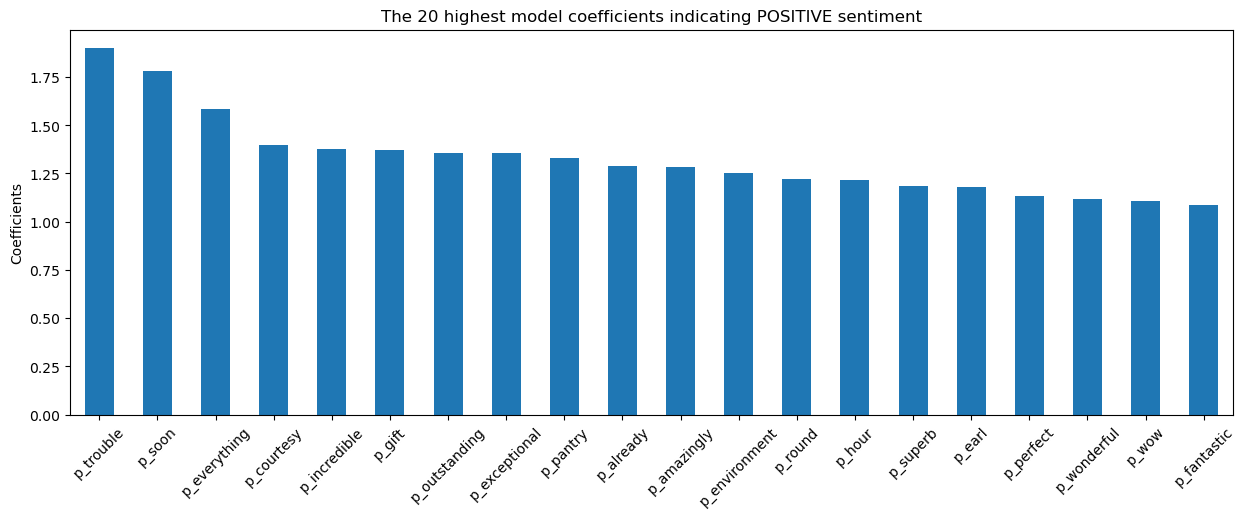

In [11]:
# Count the words by coefficients of the logistic regression
word_counts = pd.DataFrame(
    {"coefficients": hotel_logit.fit(columns_p, y_train).coef_[0]},
    index=columns_p.columns
).sort_values("coefficients", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating POSITIVE sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

In [12]:
# Filter only positive columns words with n_
columns_n = X_train.filter(regex='^n_\w{1,}$')
display(columns_n)

,n_00,n_02,n_1,n_10,n_100,n_11,n_11am,n_11pm,n_12,n_15,...,n_world,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Extract those n_ columns as a list
columns_n.columns

Index(['n_00', 'n_02', 'n_1', 'n_10', 'n_100', 'n_11', 'n_11am', 'n_11pm',
       'n_12', 'n_15',
       ...
       'n_world', 'n_worry', 'n_worth', 'n_would', 'n_write', 'n_wrong',
       'n_year', 'n_yes', 'n_yet', 'n_young'],
      dtype='object', length=1342)

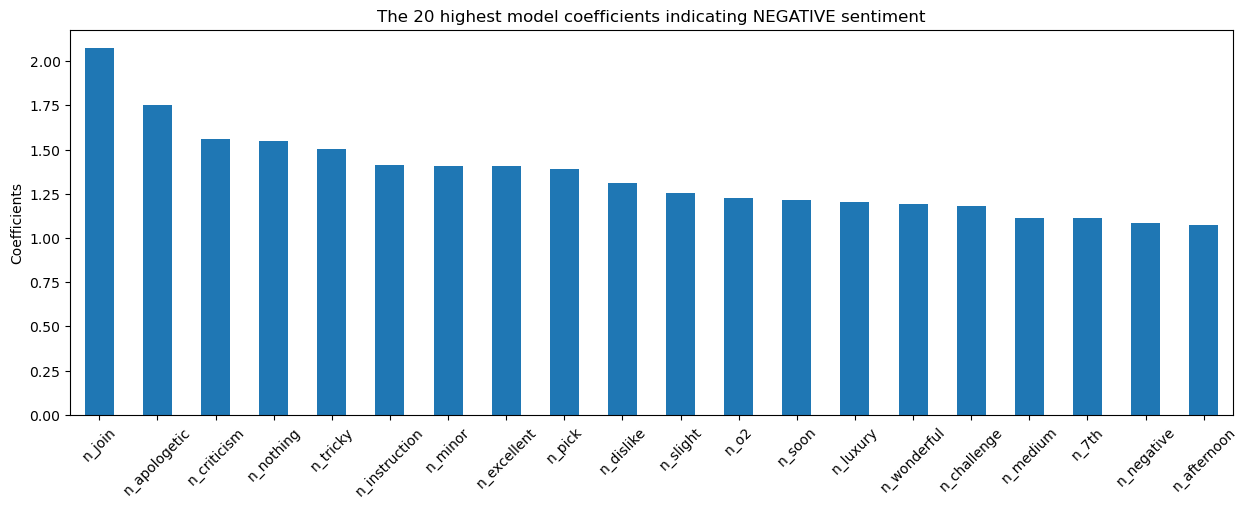

In [14]:
# Count the words by coefficients of the logistic regression
word_counts = pd.DataFrame(
    {"coefficients": hotel_logit.fit(columns_n, y_train).coef_[0]},
    index=columns_n.columns
).sort_values("coefficients", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating NEGATIVE sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

### 1c. Reduce the dimensionality of the dataset using PCA, what is the relationship between the number of dimensions and run-time for a logistic regression?

It is important to use the scaled data set and not the original data set for the PCA. Next, run the PCA on the scaled X_train_scaled without modifying the n_components. Then make a line plot of explained variance ratios. The elbow in the plot show how many PCAs are sufficient. Then, rerun the model witht the new n_components

In [15]:
# Recall the scaled dataset
display(X_train_scaled)
display(X_test_scaled)

array([[-0.20118373,  1.09742618, -0.02339358, ...,  0.46720125,
        -0.76918389, -0.17395791],
       [ 0.85906643,  1.77043536, -0.02339358, ...,  0.46720125,
        -1.2433886 , -0.17395791],
       [ 0.42200406, -0.41684447, -0.02339358, ...,  0.46720125,
        -1.2433886 ,  1.29265168],
       ...,
       [-0.29757011,  0.25616471, -0.02339358, ...,  0.46720125,
        -0.76918389, -1.6405675 ],
       [-0.97559842, -0.58509676, -0.02339358, ...,  0.46720125,
        -1.2433886 ,  1.29265168],
       [-0.58340557, -0.92160135, -0.02339358, ...,  0.46720125,
        -0.29497919, -0.17395791]])

array([[ 0.42418884, -0.07821496, -0.02652479, ...,  0.48736947,
        -1.23583971, -0.19686141],
       [-0.42588953,  0.75240534, -0.02652479, ...,  0.48736947,
         1.62776498,  1.29781413],
       [-0.28968006,  1.58302563, -0.02652479, ...,  0.48736947,
        -0.75857226, -1.69153696],
       ...,
       [-0.27162821,  0.0879091 , -0.02652479, ...,  0.48736947,
         0.67323008, -0.19686141],
       [-0.20762617,  1.08465346, -0.02652479, ...,  0.48736947,
         1.15049753,  1.29781413],
       [-0.0041325 , -0.07821496, -0.02652479, ...,  0.48736947,
        -0.75857226, -0.19686141]])

In [16]:
# load the PCA sequence
from sklearn.decomposition import PCA

# Default n_components will generate the same number of PCs as you have features 
my_PCA = PCA()
my_PCA.fit(X_train_scaled)

# transform data 
X_train_PCA = my_PCA.transform(X_train_scaled)
X_test_PCA = my_PCA.transform(X_test_scaled)


In [17]:
# Use explained_variance_ratio
expl_var = my_PCA.explained_variance_ratio_

# Use Pyplot express to make a line plot
import plotly.express as px


fig = px.line(expl_var,
        range_x = [0,20],
        title='Number of PCs vs Porpotion of Variance Explained',
        labels={'value': 'Proportion of Variance Explained',
                'index': 'Number of PCs'})

fig.show()

After 5 PCs, the amount of additional variance provided by subsequent PCs become very small, thus, the value of addtional PCs diminishes.

In [18]:
# Rerun the PCs

# Instantiate and fit
my_PCA = PCA(n_components = 5)
my_PCA.fit(X_train_scaled)

# Transform train and test
X_train_PCA = my_PCA.transform(X_train_scaled)
X_test_PCA = my_PCA.transform(X_test_scaled)

print(f'Original: {X_train_scaled.shape}')
print(f'PCA Transformed: {X_train_PCA.shape}')

Original: (12798, 2743)
PCA Transformed: (12798, 5)


In [19]:
# Find the run time for different number of features using time and number of PCs
import time

for i in range(1,20):

    # Instantiate and fit
    my_PCA = PCA(n_components=i)
    my_PCA.fit(X_train_scaled)
    # Fit the PCA model
    X_train_PCA = my_PCA.transform(X_train_scaled)

    # Instantiate model for Logregression
    hotel_logit = LogisticRegression(solver='lbfgs', random_state=1, max_iter=100)

    # Find run time for each n_components for the logregression on the X_train_PCA
    print(f'n_components= {i}') 
    %timeit -r3 hotel_logit.fit(X_train_PCA, y_train) #run 3 times and take average time 
    

n_components= 1
4.66 ms ± 146 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)
n_components= 2
5.38 ms ± 25.4 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)
n_components= 3
6.17 ms ± 10.6 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)
n_components= 4
5.84 ms ± 15.9 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)
n_components= 5
6.36 ms ± 108 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)
n_components= 6
6.79 ms ± 14.1 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)
n_components= 7
6.74 ms ± 30.4 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)
n_components= 8
6.8 ms ± 5.92 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)
n_components= 9
6.48 ms ± 23.9 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)
n_components= 10
6.95 ms ± 27.4 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)
n_components= 11
7.39 ms ± 29 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)
n_components= 12
7.11 ms ± 24.6 µs 

### 1d. List one advantage and one disadvantage of dimensionality reduction

Advantage: PCA reduces overfitting of the model. 

Disadvantage: PCA recudes the ease of data interpretability as PCs is a linear combinations of the original features. 

## 2. Employ a K-Nearest Neighbour classifier on this dataset:

### 2a. Fit a KNN model to this data. What is the accuracy score on the test set?

In [ ]:
# Use the scaled dataset as KNN is sensitive to distance between data points
from sklearn.neighbors import KNeighborsClassifier

# Fit the default KNN model
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train_scaled, y_train)

print("Using the default number of neighbours:", KNN_model.n_neighbors)
print("Train Accuracy:", KNN_model.score(X_train_scaled, y_train))
print("Test Accuracy:", KNN_model.score(X_test_scaled, y_test))

Using the default number of neighbours: 5


c:\Users\ethai\anaconda3\envs\timeseries\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Train Accuracy: 0.751211126738553
Test Accuracy: 0.6517459573470823


c:\Users\ethai\anaconda3\envs\timeseries\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



The accuracy score of the test set is 65%

### 2b. KNN is a computationally expensive model. Reduce the number of observations (data points) in the dataset. What is the relationship between the number of observations and run-time for KNN?

Reducing the number of observations can be either the number of rows or columns or both. In this question, PCA will be used to reduce the number of observations.

In [ ]:
# Find the run time for different number of features using time and number of PCs
import time

for i in range(1,13):
    for n in range(3,5):
    # Instantiate and fit
        my_PCA = PCA(n_components=i)
        my_PCA.fit(X_train_scaled)
    # Fit the PCA model
        X_train_PCA = my_PCA.transform(X_train_scaled)

    #Instantiate and fit
        KNN_model = KNeighborsClassifier(n_neighbors=n) # use detfault n_neighbors = 5
    
    #Score model
        print(f'for {i} PCA n_components, and {n} n_neighbors, the run time for KNN model on TRAIN set is: ')
        %timeit KNN_model.fit(X_train_PCA, y_train)
    


for 1 PCA n_components, and 3 n_neighbors, the run time for KNN model on TRAIN set is: 
6.82 ms ± 196 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
for 1 PCA n_components, and 4 n_neighbors, the run time for KNN model on TRAIN set is: 
8.51 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
for 2 PCA n_components, and 3 n_neighbors, the run time for KNN model on TRAIN set is: 
7.69 ms ± 532 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
for 2 PCA n_components, and 4 n_neighbors, the run time for KNN model on TRAIN set is: 
7.7 ms ± 838 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
for 3 PCA n_components, and 3 n_neighbors, the run time for KNN model on TRAIN set is: 
8.16 ms ± 1.27 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
for 3 PCA n_components, and 4 n_neighbors, the run time for KNN model on TRAIN set is: 
11.4 ms ± 379 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
for 4 PCA n_components, and 3 n_neighbors, th

KNN model, number of neighbors and number of features have a positively correlating relationship. As Number of observations increases, KNN model runtime increases. 

### 2c. List one advantage and one disadvantage of reducing the number of observations.

Advantage: Reduce computational run time

Disadvantage: KNN makes no assumption about the dataset, which can lead to OVERFITTING without sufficient observations 

### 2d. Use the dataset to find an optimal value for K in the KNN algorithm. You will need to split your dataset into train and validation sets.

In [ ]:
# From the train dataset, create a sub tran and sub validation set:
# Splitting the remainder in two chunks
X_train2, X_validation, y_train2, y_validation = \
    train_test_split(X_train, y_train, test_size = 0.3, random_state=1, stratify=y_train)

In [ ]:
# Check shape
print(f'Shape of test set: {X_test.shape}')
print(f'Shape of original train set: {X_train.shape}')
print(f'Shape of validation set: {X_validation.shape}')
print(f'Shape of train2 set: {X_train2.shape}')

Shape of test set: (4267, 2743)
Shape of original train set: (12798, 2743)
Shape of validation set: (3840, 2743)
Shape of train2 set: (8958, 2743)


In [ ]:
k_values = list(range(1,51, 5))
train_scores = []
validation_scores = []

scaler = StandardScaler()
scaler.fit(X_train2)
X_train2 = scaler.transform(X_train2)
X_validation = scaler.transform(X_validation)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train2, y_train2)
    
    # Evaluate
    train_scores.append(knn.score(X_train2, y_train2))
    validation_scores.append(knn.score(X_validation, y_validation))

c:\Users\ethai\anaconda3\envs\timeseries\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\ethai\anaconda3\envs\timeseries\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or 

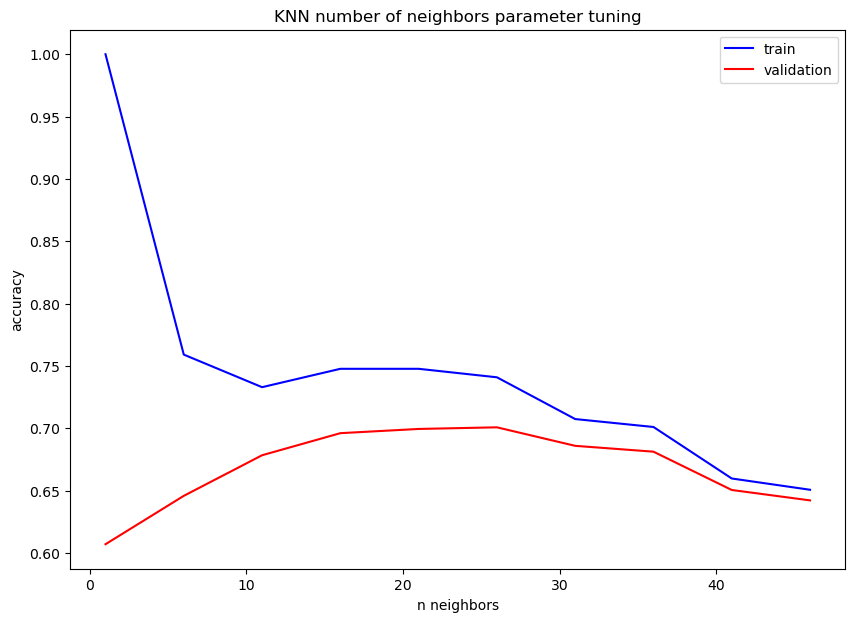

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(k_values, train_scores, c='blue', label='train')
plt.plot(k_values, validation_scores, c='red', label='validation')
plt.xlabel('n neighbors')
plt.ylabel('accuracy')
plt.title("KNN number of neighbors parameter tuning")
plt.legend()
plt.show()

The optimal K values aka. n_neighbors for the KNN is between 30-40. The reason why K shouldn't be between 20-30 is that they seem to be overfitting between 20-30. For K values between 30-40, they seem to well fit and the accuracy score only droppe 5% comparing to 20-30. 

In [ ]:
# Find the Accuracry score on TEST set using the n_neighbors above
for i in range(30,37):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train2, y_train2)

    print(f'k={i},test score is {knn.score(X_test_scaled, y_test)}')


c:\Users\ethai\anaconda3\envs\timeseries\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



k=30,test score is 0.6958050152331849


c:\Users\ethai\anaconda3\envs\timeseries\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



k=31,test score is 0.6803374736348723


c:\Users\ethai\anaconda3\envs\timeseries\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



k=32,test score is 0.6897117412702133


c:\Users\ethai\anaconda3\envs\timeseries\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



k=33,test score is 0.67354112959925


c:\Users\ethai\anaconda3\envs\timeseries\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



k=34,test score is 0.6812749003984063


c:\Users\ethai\anaconda3\envs\timeseries\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



k=35,test score is 0.668150925708929
k=36,test score is 0.6756503398172018


c:\Users\ethai\anaconda3\envs\timeseries\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



The accuracy score on the test set is between 67-68% for n_neighbors between 30-37, which is close to the train and validation sets. The model has a good fit.

### 2e. What is the issue with splitting the data into train and validation sets after performing vectorization?


Firstly, Vectorization is a a ML method which might introduce some data leakage. Rule of thumb, ML models shouldnt see the validation or test data. To ensure no leakage, splitting data to train, test and validation should be done to the original data set, prior to any ML models including vectorizer.

Secondly, KNN is computationally inefficient with large number of observations/features. Performing KNN model on train and validation data after vectorization will significantly increase the runtime.

## 3. Employ a Decision Tree classifier on this dataset:

### 3a. Fit a decision tree model to this data. What is the accuracy score on the test set?

In [ ]:
# DecisionTree doesn't require scaling because it process 1 feature individually. Thus, use the non-scaling data
from sklearn.tree import DecisionTreeClassifier
#Fit to the training data
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

print(f"The TRAIN classification accuracy is:  {DT_model.score(X_train,y_train)}")
print(f"The TEST classification accuracy is:  {DT_model.score(X_test,y_test)}")

The TRAIN classification accuracy is:  1.0
The TEST classification accuracy is:  0.7030700726505742


Overfitting in the model. The TEST accuracy is 70.3%

### 3b. Use the data set (or a subsample) to find an optimal value for the maximum depth of the decision tree. You will need to split your data set into train and validation.

In [ ]:
# From the train dataset, create a sub tran and sub validation set:
# Splitting the remainder in two chunks
X_train2, X_validation, y_train2, y_validation = \
    train_test_split(X_train, y_train, test_size = 0.3, random_state=1, stratify=y_train)

In [ ]:
# Check shape
print(f'Shape of test set: {X_test.shape}')
print(f'Shape of original train set: {X_train2.shape}')
print(f'Shape of validation set: {X_validation.shape}')

Shape of test set: (4267, 2743)
Shape of original train set: (8958, 2743)
Shape of validation set: (3840, 2743)


In [ ]:
# Run the model on a max_depth of from 1 to 20, with a minimum leaf = 2 (to prevent overfitting)
scores = pd.DataFrame()

depth_range = 21

for m in range(1, depth_range):
    dt_model = DecisionTreeClassifier(max_depth=m, min_samples_leaf=2)
    dt_model.fit(X_train2, y_train2)
    
    # Scoring
    train_score = dt_model.score(X_train2, y_train2)
    validation_score = dt_model.score(X_validation, y_validation)
    

    scores = scores.append({'Depth': m, 'Train Score': train_score, 'Validation Score': validation_score}, ignore_index=True)

C:\Users\ethai\AppData\Local\Temp\ipykernel_14756\296688246.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ethai\AppData\Local\Temp\ipykernel_14756\296688246.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ethai\AppData\Local\Temp\ipykernel_14756\296688246.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ethai\AppData\Local\Temp\ipykernel_14756\296688246.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ethai\AppData\Local\Temp\ipykernel_14756\296688246.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

In [ ]:
# Printthe best score
print("My best score is:", best_score)
print(scores[scores['Validation Score'] == best_score])

My best score is: 0.75703125
   Depth  Train Score  Validation Score
5    6.0     0.766354          0.757031


The optimum max_depth is 6 with a TRAIN and VALIDATION score are 76.6% and 76.7% which is very close and creat a good fit. Let's run the score on the TEST set

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=2)
dt_model.fit(X_train2, y_train2)

dt_model.score(X_test, y_test)

0.7464260604640263

The TEST score is 74.6% which is also close to the TRAIN and VALIDATION scores. The model has a good fit.

### 3c. Provide two advantages of decision trees over KNN. Provide two weaknesses of decision trees (classification or regression trees)

Advantages:
1. Decision Tree doesnt require data normalization (ie. scaling data) while KNN does. (Little data preparation required)
2. Decision Tree is faster than KNN in run time due to KNN's computationally expensiveness.

Disadvantages:
1. Decision Tree can create over-complex trees and cause overfitting.
2. Small variations in the data might result in a completely different tree.

## 4. What is the purpose of the validation set, i.e., how is it different than the test set?

Each machine learning model has its own hyperparameters such as C in LogisticRegression, n_neighbors in KNN, or max_depth in DecisionTreeClassifier, etc. These hyperparameters can be tuned to improve the score of the model. By spliting the training data into train, validation, and test sets, we can tune these hyperparameters on the validation set instead of the test set. This is to ensure no potential leakage or model violation of the unseen data, aka. the test set. 

Differences: Test set is part of the original set which was splitted into remainder and test set. Validation set was part of the remainder set.

## 5. Re-run a decision tree or logistic regression on the data again:

### 5a. Perform a 5-fold cross validation to optimize the hyperparameters of your model.

We will perform a DecisionTreeClassifier using 5-fold cross validation to optimize the hyperparameters. Due to the limitation of the laptop's processor, we will only tuning 1 hyperparameter which is the m_depth. There will be no feature union, reduction 

In [ ]:
# import K-fold validation library
from sklearn.model_selection import cross_val_score

In [ ]:
# DecisionTree doesn't require scaling because it process 1 feature individually. Thus, use the non-scaling data
from sklearn.tree import DecisionTreeClassifier

#Fit to the training data
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

# 2. Fit model on 5 folds.
# The variable "scores" will hold 5 accuracy scores, 
# each from a different train and validation split
scores = cross_val_score(DT_model, X_train, y_train, cv = 5)

# Every score corresponds to a fold
for i in range(len(scores)) :
    print(f"Fold {i+1}: {scores[i]}")

# Take the average score
print(f"Average Score:{np.mean(scores)}")

Fold 1: 0.7015625
Fold 2: 0.68203125
Fold 3: 0.6796875
Fold 4: 0.7076983196561156
Fold 5: 0.712778429073857
Average Score:0.6967515997459945


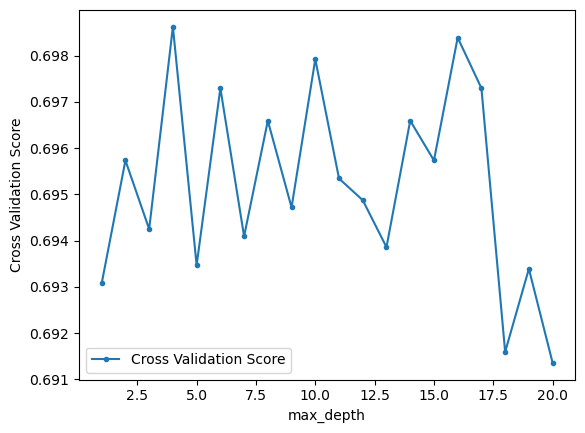

In [ ]:
# Tuning the max_depth hyperparameters
#Store the results
cross_validation_scores = []

#Do some cross validation
# only tuning max_depth, keep other hyperparameters constant
for m in range(1, 21):
    dt_model = DecisionTreeClassifier(max_depth=m)
    dt_model.fit(X_train, y_train)
    
    # the cross validation score (mean of scores from all folds)
    cv_score = np.mean(cross_val_score(DT_model, X_train, y_train, cv = 5))
    
    cross_validation_scores.append(cv_score)

plt.figure()
plt.plot(list(range(1, 21)), cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Cross Validation Score')
plt.show();

max_depth = 4 is the best k-value for DecisionTreeClassifier with the highest score using 5-fold cross-validation model. 

In [ ]:
# TEST SCORE 
dt_model = DecisionTreeClassifier(max_depth=4)

dt_model.fit(X_train, y_train)

dt_model.score(X_test, y_test)

0.734239512538083

### 5b. What does your confusion matrix look like for your best model on the test set?

In [ ]:
# Fit the model using max_depth = 4
dt_model = DecisionTreeClassifier(max_depth=4)
dt_model.fit(X_train, y_train)

# Classify the test set
y_pred = dt_model.predict(X_test)

# Put into a dataframe and check
class_df = pd.DataFrame(y_pred, columns=['predicted class'])
class_df

,predicted class
0,1
1,0
2,1
3,0
4,0
...,...
4262,1
4263,0
4264,1
4265,0


In [ ]:
# Checking the distribution of predicted output classes
class_df['predicted class'].value_counts(normalize=True)

1    0.644481
0    0.355519
Name: predicted class, dtype: float64

In [ ]:
# import confusion_matrix from sklearn
from sklearn.metrics import confusion_matrix

# Build the confusion matrix as a dataframe
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['Predicted 0 - NEGATIVE', 'Predicted 1 - POSITIVE'])

# Add a column that sums up the actuals
confusion_df['Sum of Actuals'] = confusion_df.sum(axis=1)

# Add a row that sums up the predictions
confusion_df = confusion_df.append(pd.Series(confusion_df.sum(axis=0)), ignore_index=True)

# Fix the indices
confusion_df.index=['Actual 0 - NEGATIVE', 'Actual 1- POSTIVE', 'Sum of Predictions'] 

# Check
confusion_df

C:\Users\ethai\AppData\Local\Temp\ipykernel_20680\3767840170.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confusion_df = confusion_df.append(pd.Series(confusion_df.sum(axis=0)), ignore_index=True)


,Predicted 0 - NEGATIVE,Predicted 1 - POSITIVE,Sum of Actuals
Actual 0 - NEGATIVE,1096,713,1809
Actual 1- POSTIVE,421,2037,2458
Sum of Predictions,1517,2750,4267


In [ ]:
# Show the Classification Report
from sklearn.metrics import classification_report

print('Classification report for a threshold of 0.5 \n')
print(classification_report(y_test, y_pred))

Classification report for a threshold of 0.5 

              precision    recall  f1-score   support

           0       0.72      0.61      0.66      1809
           1       0.74      0.83      0.78      2458

    accuracy                           0.73      4267
   macro avg       0.73      0.72      0.72      4267
weighted avg       0.73      0.73      0.73      4267



0.5 is the default threshold for the model to determine the precision, recall, and f1-score. Higher threshold will increase the precision but lower the recall. Vice versa, lower the threshold will increase the recall but decrese the precision.

## 6. Create one new feature of your choice:

### 6a. Explain your new feature and why you consider it will improve accuracy.

We will create the new feature using 2 steps: 1. Using KBest to extract the best features from the training data. Then use the PCA/KernalPCA to create a new feature by merging the KBest feature. We will use GridSearch to find the new feature. We will use DecisionTreeClassifier again and will not require normalization. 

### 6b. Run the model from question 5 again. You will have to re-optimize your hyperparameters. Has the accuracy score of your best model improved on the test set after adding the new feature you created?

In [ ]:
# Import KBest to select the best features from the train data set
from sklearn.feature_selection import SelectKBest

# Import f_classif and f_regression by performing ANOVA on features
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression

# load the PCA sequence
from sklearn.decomposition import PCA

# Import ML pipeline 
from sklearn.pipeline import Pipeline

# Import GridSearchCV to test multiple hyperparameters and find the best one + cross validation
from sklearn.model_selection import GridSearchCV

In [ ]:
# use mkdtemp to reduced memory usage
from tempfile import mkdtemp
cachedir = mkdtemp()

# Create placeholders for all three steps
estimators = [
    ('kbest', SelectKBest()),
    ('dim_reducer', PCA()), 
    ('model', DecisionTreeClassifier())
]

my_pipe = Pipeline(estimators, memory = cachedir)

In [ ]:
# Try different hyperparameters

param_grid = [
    {
        'kbest': [SelectKBest()], 
        'kbest__score_func': [f_classif, f_regression],
        'kbest__k': [10,15,20],

        'dim_reducer': [PCA()], 
        'dim_reducer__n_components': [2, 3, 4],

        'model': [DecisionTreeClassifier()], 
        'model__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'model__min_samples_leaf': [2, 3, 4, 5],
        
    }
]

grid = GridSearchCV(my_pipe, param_grid, cv=5)

fittedgrid = grid.fit(X_train, y_train)

c:\Users\ethai\anaconda3\envs\timeseries\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 35 112 160 257 313 333 380 402 403 404 405 408 409] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\Users\ethai\anaconda3\envs\timeseries\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\ethai\anaconda3\envs\timeseries\lib\site-packages\sklearn\pipeline.py:303: UserWarning: Persisting input arguments took 0.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(
c:\Users\et

In [ ]:
fittedgrid.best_params_

{'dim_reducer': PCA(n_components=4),
 'dim_reducer__n_components': 4,
 'kbest': SelectKBest(score_func=<function f_regression at 0x0000015C112AEB80>),
 'kbest__k': 10,
 'kbest__score_func': <function sklearn.feature_selection._univariate_selection.f_regression(X, y, *, center=True)>,
 'model': DecisionTreeClassifier(max_depth=7, min_samples_leaf=3),
 'model__max_depth': 7,
 'model__min_samples_leaf': 3}

In [ ]:
# Apply the best ML pipeline model to the TEST data
fittedgrid.score(X_test, y_test)

0.7333020857745489

The TEST score in 6b. after running the ML pipeline is 73.3% while it was 74% in 5b (5-fold cross validation, no pipeline analysis). Thus, the pipeline analysis did not improve the accuracy score for the model. The reason could be that KBEST and PCA might not be the best combination to create a new feature. 

|  | Logistic | KNN | DecisionTree |
| :-: | :-: | :-: |:-: |
| Train Accuracy (%) | 88.58 | 75.12 | 76.63 |
| Test Accuracy (%)| 73.40 | 65.17 | 74.64 |

